In [3]:
import matplotlib.pyplot as plt
import nengo
import nengo_dl
import numpy as np
import pickle

import _init_paths

from utils.base_utils.exp_utils import get_filtered_signal_from_spikes
from configs.exp_configs import tf_exp_cfg as exp_cfg, nengo_dl_cfg as ngo_cfg

/home/rgaurav/miniconda3/envs/nengo-tf/lib/python3.7/site-packages/nengo_dl/converter.py:360: UserWarning: Layer '<class 'tensorflow.python.keras.layers.normalization_v2.BatchNormalization'>' already has a converter. Overwriting.
  "Layer '%s' already has a converter. Overwriting." % keras_layer


In [4]:
# Set the seed.
seed = 0
# Low Pass Filter.
low_pass_filt = lambda t, tau: (1/tau) * np.exp(-t/tau)
time_range = np.arange(0, 0.05, 0.001)
np.random.seed(seed)
spikes = np.random.choice((0, 1), 80, p=(0.8, 0.2))
print("Time Range", time_range)
print("Random Spikes", spikes)

Time Range [0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049]
Random Spikes [0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0]


Text(0.5, 0.98, 'Tau: 0.001')

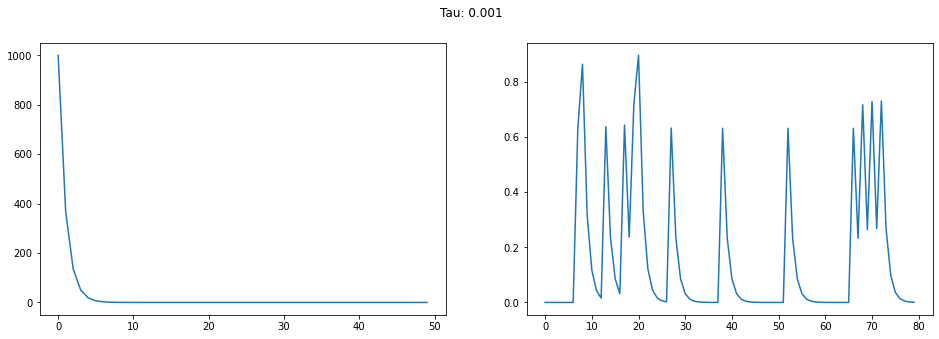

In [5]:
tau = 0.001
low_pass = nengo.Lowpass(tau=tau)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(low_pass_filt(time_range, tau))
axs[1].plot(low_pass.filt(spikes))
fig.suptitle("Tau: %s" % tau)

Text(0.5, 0.98, 'Tau: 0.005')

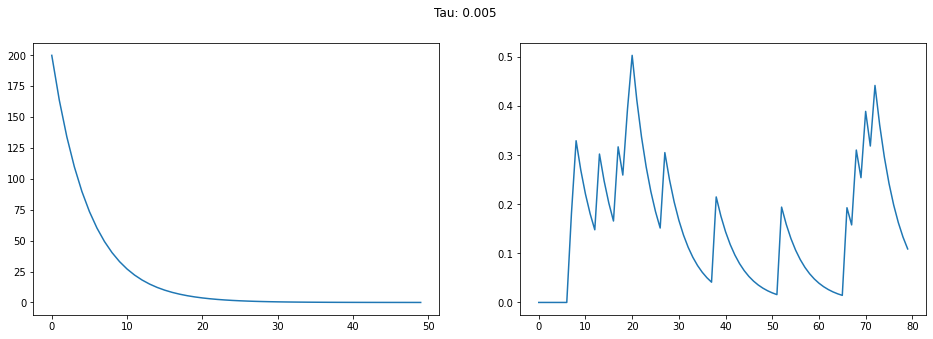

In [6]:
tau = 0.005
low_pass = nengo.Lowpass(tau=tau)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(low_pass_filt(time_range, tau))
axs[1].plot(low_pass.filt(spikes))
fig.suptitle("Tau: %s" % tau)

In [7]:
ngo_cfg["sfr"], ngo_cfg["n_steps"] = 250, 80
ngo_cfg["ndl_res_otpt_dir"] = "/scratch/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/ndl_spkg_results/"
spks_ndl_otpt = pickle.load(open(ngo_cfg["ndl_res_otpt_dir"]+"ndl_model_1_results_sfr_%s_nstps_%s.p"  
                                 % (ngo_cfg["sfr"], ngo_cfg["n_steps"]), "rb"))

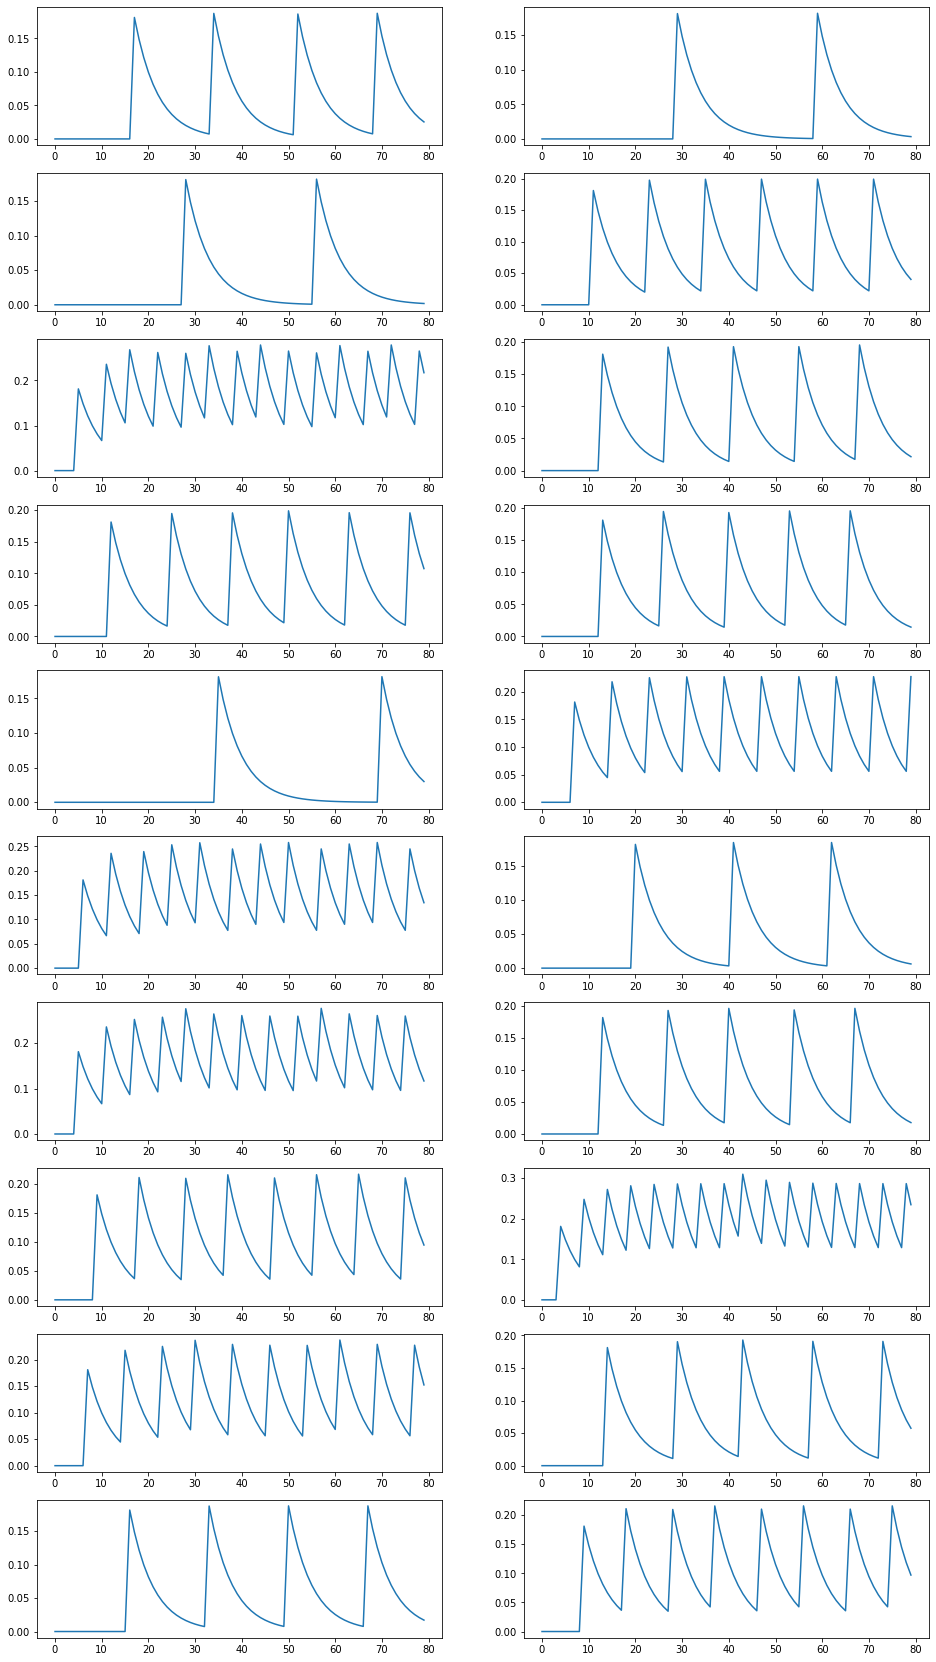

In [28]:
#dict_keys(['conv2d.0', 'conv2d_1.0', 'conv2d_2.0', 'conv2d_3.0', 'conv2d_4.0', 'dense.0', 'dense_1.0'])
test_index, num_rnd_neurons = 0, 128
spikes_matrix = spks_ndl_otpt["spk_res"][test_index]["conv2d.0"] * ngo_cfg["sfr"] * 0.001
np.random.seed(seed)
# Get some random neuron indices.
neuron_indices = np.random.choice(20000, num_rnd_neurons)
fig, axs = plt.subplots(int(20/2), 2, figsize=(16, 3*int(20/2)))
j=0
for i in range(num_rnd_neurons):
    if np.all((spikes_matrix[:, neuron_indices[i]]==0)):
        continue
    axs[int(j/2), int(j%2)].plot(low_pass.filt(spikes_matrix[:, neuron_indices[i]]))
    j+=1
    if j==20:
        break